In [1]:
# Based on https://lablab.ai/t/stable-diffusion-img2img

import torch
from torch import autocast

from diffusers import StableDiffusionImg2ImgPipeline

2022-12-14 21:46:04.485348: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-14 21:46:05.692022: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/cuda/include:/usr/lib/cuda/lib64:/usr/lib/cuda/include:/usr/lib/cuda/lib64::/usr/local/cuda-11.4/extras/Debugger/lib64:/usr/local/cuda-11.4/extras/Debugger/include
2022-12-14 21:46:05.692114: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: N

In [2]:
device = "cuda"
model_path = "CompVis/stable-diffusion-v1-4"

pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    model_path,
    revision="fp16",
    torch_dtype=torch.float16
)
pipe = pipe.to(device)

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

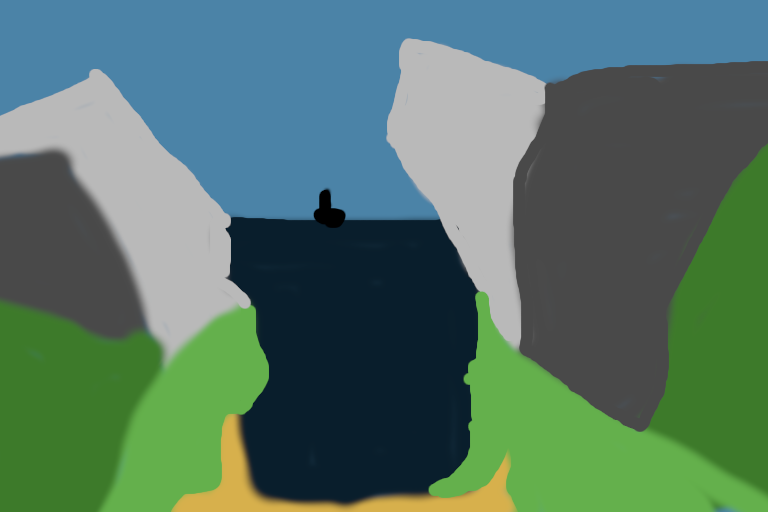

In [51]:
from PIL import Image
init_img = Image.open("/home/pawel/git/NeuralNetworksSketchbook/fiord.png").convert("RGB")
init_img


In [69]:
prompt = "Nordic fjord, summer morning light, aerial view, cinematic Light, Soft illumination, cinematic composition, wide-angle, atmospheric,matte painting, Trending on artstation, — uplight, by National Geographic"

  0%|          | 0/41 [00:00<?, ?it/s]

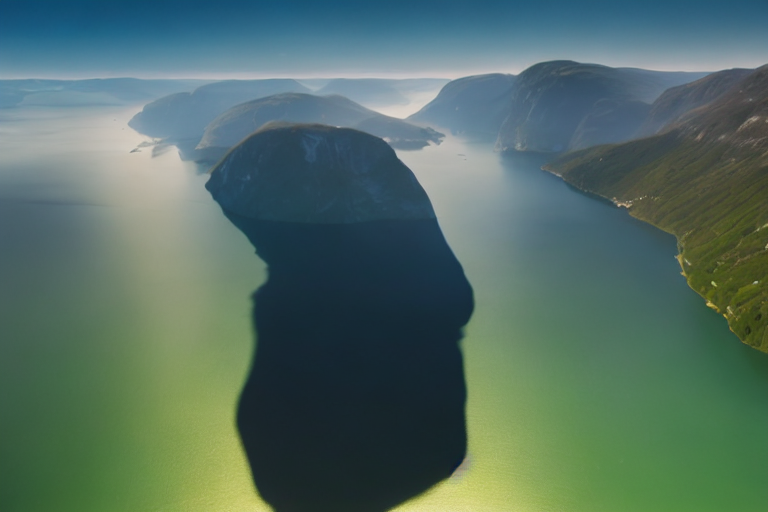

In [79]:
generator = torch.Generator(device=device).manual_seed(1024)
with autocast("cuda"):
    image = pipe(prompt=prompt, init_image=init_img, strength=0.8, guidance_scale=7.5, generator=generator, num_inference_steps=50).images[0]
image

  0%|          | 0/12 [00:00<?, ?it/s]

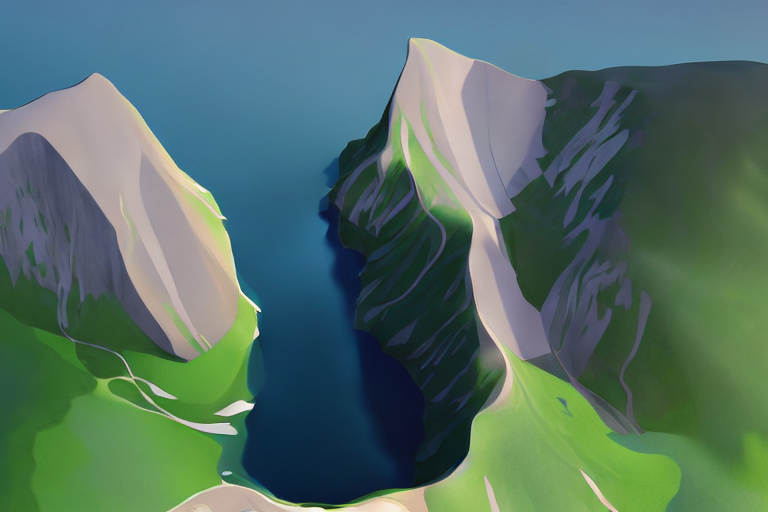

In [80]:
with autocast("cuda"):
    image = pipe(prompt=prompt, init_image=init_img, strength=0.75, guidance_scale=7.5, generator=generator, num_inference_steps=15).images[0]
image

  0%|          | 0/38 [00:00<?, ?it/s]

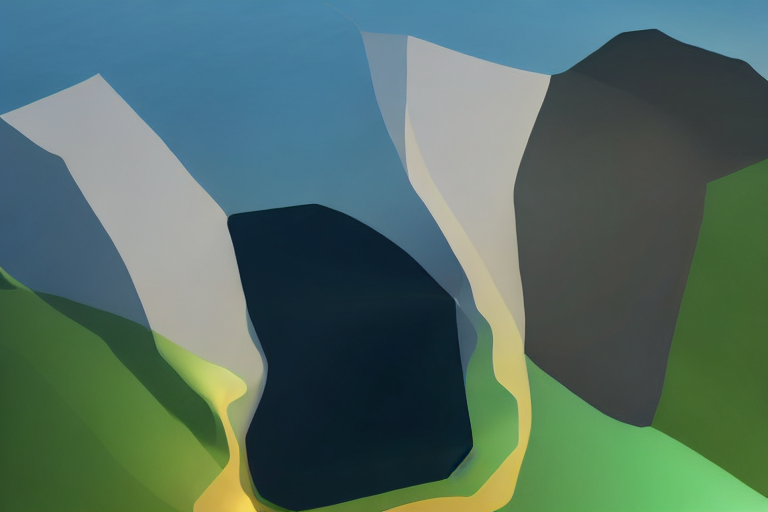

In [81]:
with autocast("cuda"):
    image = pipe(prompt=prompt, init_image=init_img, strength=0.75, guidance_scale=7.5, generator=generator, num_inference_steps=50).images[0]
image

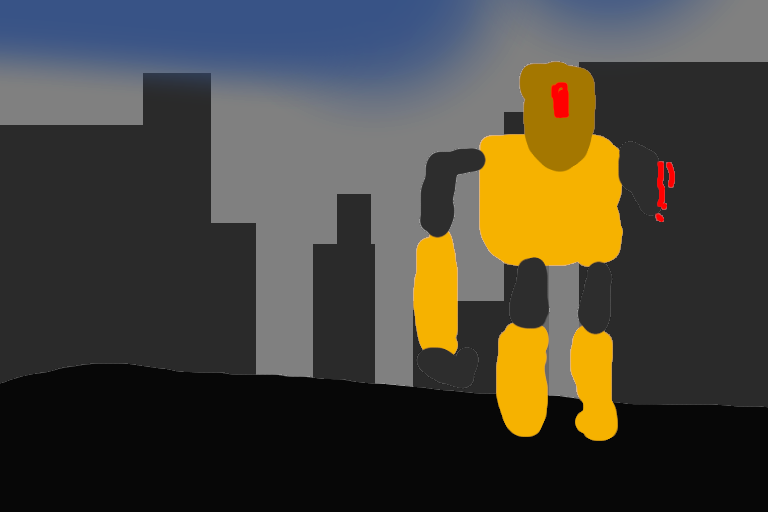

In [82]:

from PIL import Image
init_img = Image.open("/home/pawel/git/NeuralNetworksSketchbook/robot.png").convert("RGB")
init_img

In [103]:
prompt = "A photo of an industrial robot, Mega city in ruins; dystopian; steampunk; dynamic lighting, in the style of Mad Max, trending on artstation, national geographic, highly detailed"

  0%|          | 0/41 [00:00<?, ?it/s]

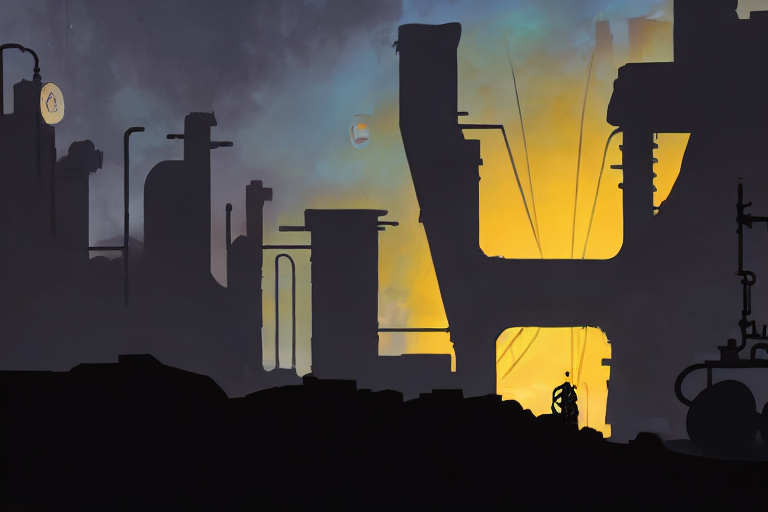

In [104]:
with autocast("cuda"):
    image = pipe(prompt=prompt, init_image=init_img, strength=0.8, guidance_scale=7.5, generator=generator, num_inference_steps=50).images[0]
image


  0%|          | 0/41 [00:00<?, ?it/s]

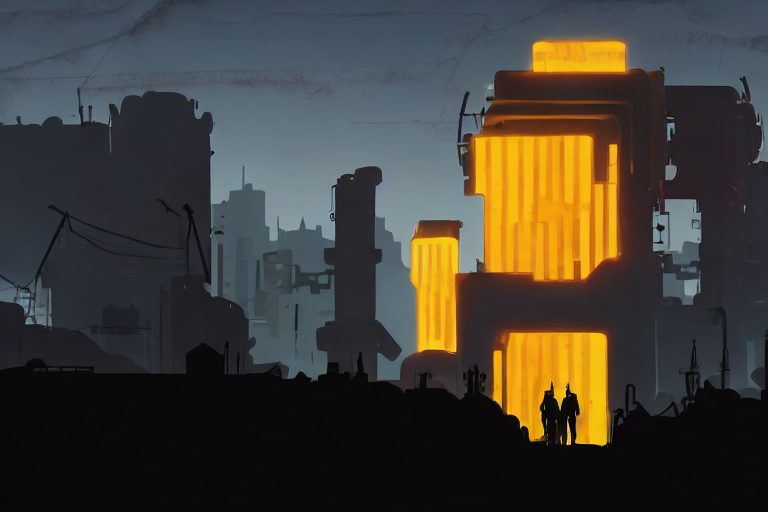

In [110]:

with autocast("cuda"):
    image = pipe(prompt=prompt, init_image=init_img, strength=0.8, guidance_scale=5.5, generator=generator, num_inference_steps=50).images[0]
image

  0%|          | 0/36 [00:00<?, ?it/s]

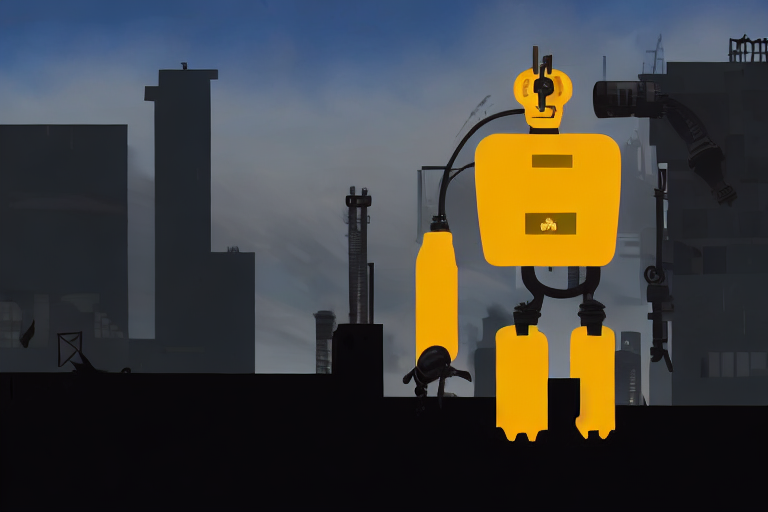

In [111]:


with autocast("cuda"):
    image = pipe(prompt=prompt, init_image=init_img, strength=0.7, guidance_scale=5.5, generator=generator, num_inference_steps=50).images[0]
image